Creating a graph

In [1]:
import networkx as nx
G = nx.Graph()

Nodes

In [3]:
G.add_node(1)

G.add_nodes_from([2, 3])

G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

H = nx.path_graph(10)
G.add_nodes_from(H)

G.add_node(H)

Edges

In [12]:
G.add_edge(1,2)
e = (2, 3)
G.add_edge(*e) # unpack edge tuple*

G.add_edges_from([(1,2), (1, 3)])

G.add_edges_from(H.edges)

G.clear()

G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam") # adds node spam
G.add_nodes_from("spam") #adds 4 nodes s p a m
G.add_edge(3, "m")
print(G.number_of_nodes())
print(G.number_of_edges())

'''
The order of adjacency reporting (e.g., G.adj, G.successors, G.predecessors) is the order of edge addition. 
However, the order of G.edges is the order of the adjacencies which includes both the order of the nodes and each node’s adjacencies. 
See example below:
'''
DG = nx.DiGraph()
DG.add_edge(2, 1)
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

8
3


Examining elements of a graph

In [23]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))
print(G.degree[1]) #The degree of a node is the number of edges connected to the node

print(G.edges([2, 3]))
print(G.degree([2, 3]))

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]
2
[(2, 1), (3, 1), (3, 'm')]
[(2, 1), (3, 2)]


Removing elements from a graph

In [24]:
G.remove_node(2)
G.remove_nodes_from("spam")
print(list(G.nodes))
G.remove_edge(1, 3)

[1, 3, 'spam']


Using the graph constructors

In [27]:
G.add_edge(1, 2)
H = nx.DiGraph(G)
print(list(H.edges()))
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
print(list(H.edges()))

[(1, 2), (2, 1)]
[(0, 1), (1, 2), (2, 3)]


Accessing edges and neighbors

In [38]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(G[1]) # same as G.adj[1]
print(G[1][2])
print(G.edges[1, 2])

G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
print(G.edges[1, 2])

FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

{2: {'color': 'yellow'}}
{'color': 'yellow'}
{'color': 'yellow'}
{'color': 'red'}
(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)
(1, 2, 0.125)
(3, 4, 0.375)


Adding attributes to graphs, nodes, and edges

Graph attributes

In [41]:
G = nx.Graph(day = "friday")
print(G.graph)

G.graph['day'] = "monday"
G.graph

{'day': 'friday'}


{'day': 'monday'}

Node attributes

In [42]:
G.add_node(1, time = '5pm')
G.add_nodes_from([3], time='2pm')
print(G.nodes[1])
G.nodes[1]['room'] = 714
print(G.nodes.data())

{'time': '5pm'}
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]


Edge Attributes

In [44]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
print(G.edges.data())

[(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})]


Directed graphs

In [51]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.out_degree(1, weight='weight'))
print(DG.degree(1, weight='weight'))
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

H = nx.Graph(G)  # create an undirected graph H from a directed graph G or use Graph.to_undirected()

0.5
1.25
[2]
[2]


Drawing graphs

In [56]:
import matplotlib.pyplot as plt

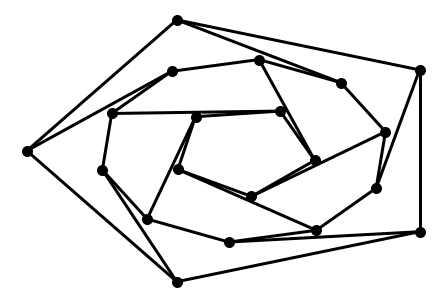

In [65]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)